# Exploratory Notebook

Use this notebook to explore the project data using `pandas`, SQL, and Matplotlib!

You will not be submitting this notebook so feel free to try out different "experiments" to figure out what works best.

When you're happy with your code and want to turn it in, copy it into the `final.ipynb` notebook and download that notebook for the PDF submission.

## CSV and TSV Data

Here is some starter code that opens up some of the CSV and TSV data and loads it into DataFrames:

In [180]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

#Proposal One Starts Here...

---



### BOM Movie Dataset

In [200]:
bom_movie_gross = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zippedData/bom.movie_gross.csv.gz")
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [201]:
bom_movie_gross.shape

(3387, 5)

In [202]:
bom_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [203]:
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [204]:
#Check for NAN 
bom_movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [205]:
# Convert foreign_gross colum to float
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')

In [206]:
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

###Create a df for Filling domestic/foreign_gross columns NAs with median



In [189]:
df_median_for_NAs = bom_movie_gross
df_median_for_NAs['foreign_gross'] = df_median_for_NAs['foreign_gross'].fillna(df_median_for_NAs['foreign_gross'].median())

In [190]:
df_median_for_NAs['domestic_gross'] = df_median_for_NAs['domestic_gross'].fillna(df_median_for_NAs['domestic_gross'].median())

In [191]:
df_median_for_NAs = df_median_for_NAs.dropna()

In [192]:
import pandas as pd
import re

non_numeric = re.compile(r'[^\d.]+')

#df = pd.DataFrame({'a': [3,2,'NA']})
#df_median_for_NAs['foreign_gross'].loc[df_median_for_NAs['foreign_gross'].str.contains(non_numeric)]

In [193]:
df_median_for_NAs.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [194]:
df_median_for_NAs.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [195]:
df_median_for_NAs.shape

(3382, 5)

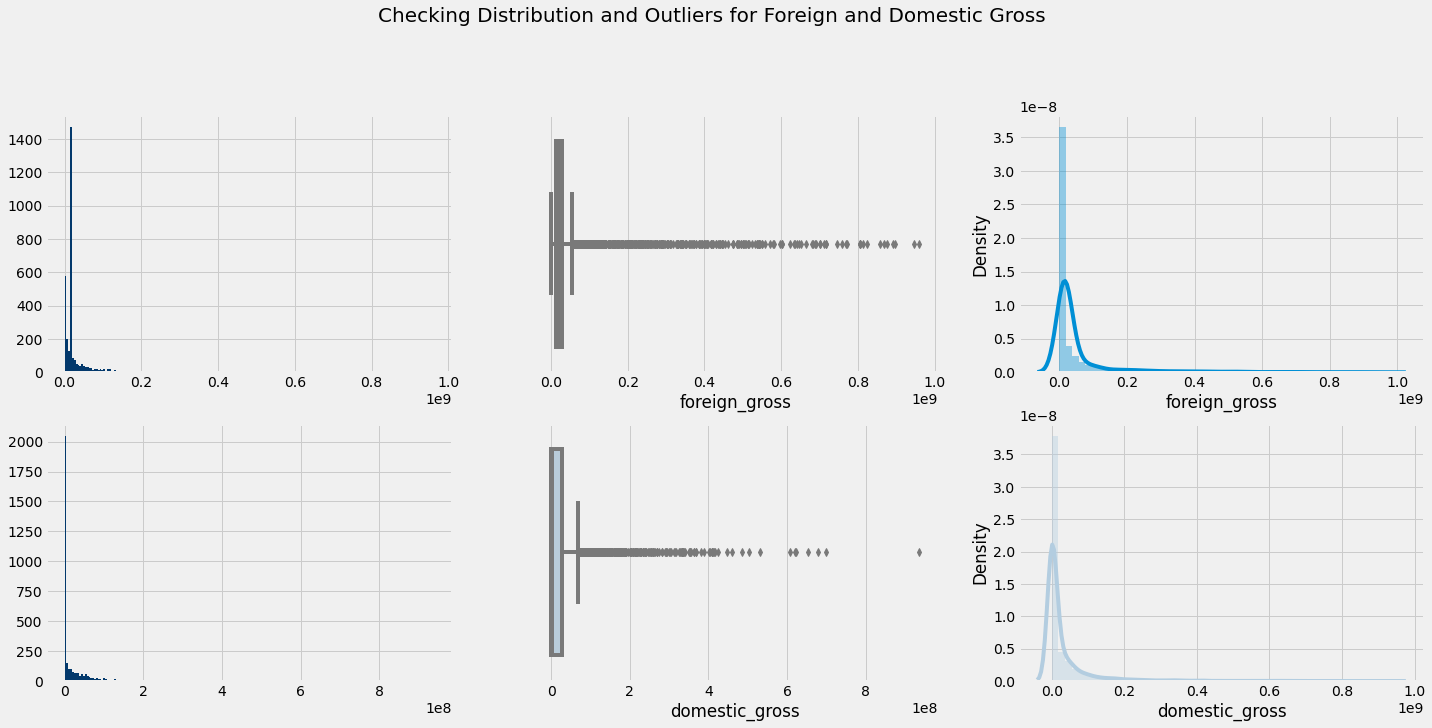

In [199]:
# initialize our plot space.
plt.figure(figsize=[22,15])
plt.suptitle("Checking Distribution and Outliers for Foreign and Domestic Gross", size=20)

# histogram for sales
plt.subplot(3,3,1)
plt.hist(df_median_for_NAs['foreign_gross'], bins=200, color='#03396c')
#plt.xlim(0,1000)

# boxplot for sales
plt.subplot(3,3,2)
sns.boxplot(df_median_for_NAs['foreign_gross'], color='#b3cde0')

# histogram for profit
plt.subplot(3,3,3)
sns.distplot(df_median_for_NAs['foreign_gross'])
#plt.hist(df_dist['profit'], bins=200, color='#03396c')
#plt.xlim(-250,300)

plt.subplot(3,3,4)
plt.hist(df_median_for_NAs['domestic_gross'], bins=200, color='#03396c')

plt.subplot(3,3,5)
sns.boxplot(df_median_for_NAs['domestic_gross'], color='#b3cde0')

plt.subplot(3,3,6)
sns.distplot(df_median_for_NAs['domestic_gross'], color='#b3cde0')

# Boxplot for profit
#plt.subplot(2,2,4)
#sns.boxplot(df_dist['profit'], color='#b3cde0')


plt.show()

###Create a df for dropping the NAs to find the mean and median



In [22]:
df_bom = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zippedData/bom.movie_gross.csv.gz")

In [23]:
df_bom.dropna(inplace=True)

In [24]:
df_bom.shape

(2007, 5)

In [25]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [26]:
#Confirm NAs are removed
df_bom.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [27]:
# Check data types
df_bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [28]:
#Check rows with non-numeric values on the foreign_gross cloumn
import pandas as pd
import re

non_numeric = re.compile(r'[^\d.]+')

#df = pd.DataFrame({'a': [3,2,'NA']})
df_bom['foreign_gross'].loc[df_bom['foreign_gross'].str.contains(non_numeric)]

1872    1,131.6
1873    1,019.4
1874    1,163.0
2760    1,010.0
3079    1,369.5
Name: foreign_gross, dtype: object

In [29]:
#df_bom['year'].loc[df_bom['year'].str.contains(non_numeric)]

In [30]:
#Remove the rows with those data
df_bom = df_bom.drop([1872,1873,1874,2760,3079])

In [31]:
#covert the column to integer
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'])

In [32]:
df_bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross       int64
year                int64
dtype: object

In [33]:
#covert the column to float
df_bom['foreign_gross'] = df_bom['foreign_gross'].astype(float)

In [34]:
#Confirm type changes
df_bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

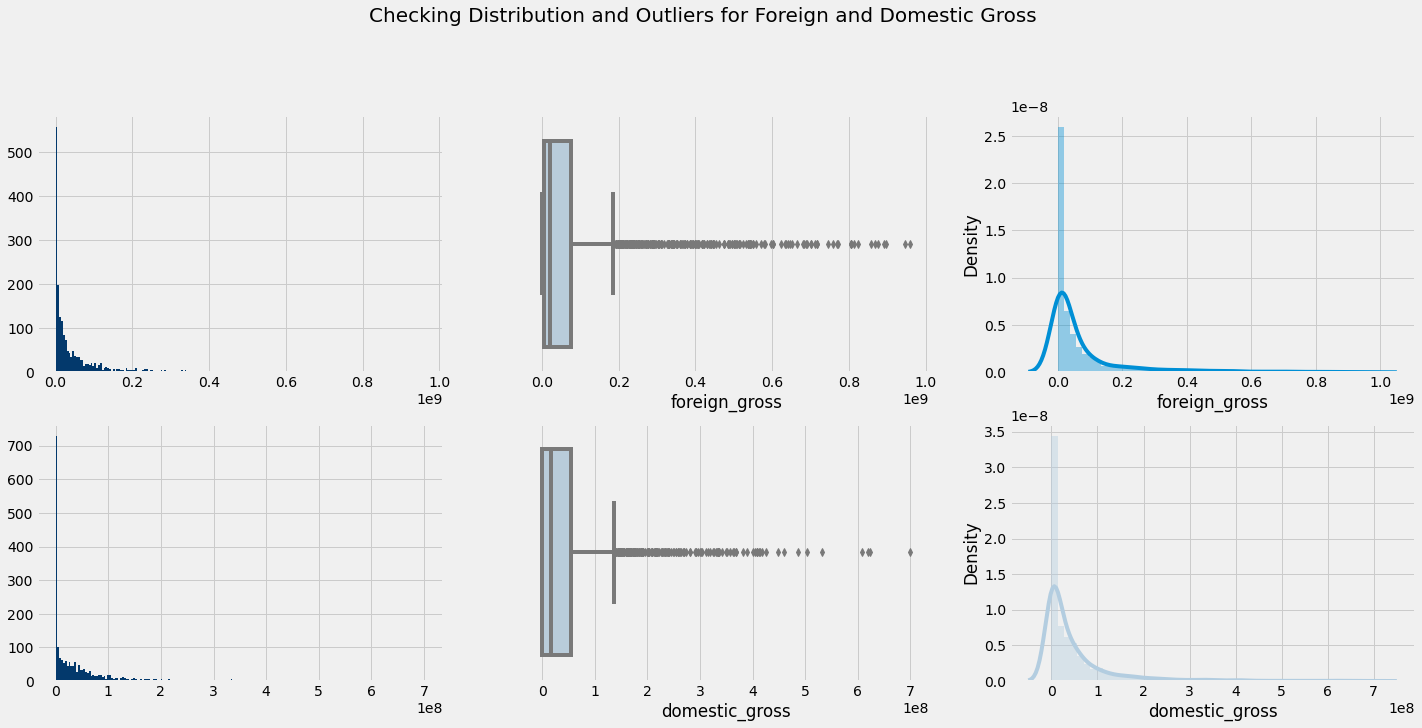

In [38]:
# initialize our plot space.
plt.figure(figsize=[22,15])
plt.suptitle("Checking Distribution and Outliers for Foreign and Domestic Gross", size=20)

# histogram for foreign gross
plt.subplot(3,3,1)
plt.hist(df_bom['foreign_gross'], bins=200, color='#03396c')
#plt.xlim(0,1000)

# boxplot for sales
plt.subplot(3,3,2)
sns.boxplot(df_bom['foreign_gross'], color='#b3cde0')

# histogram for profit
plt.subplot(3,3,3)
sns.distplot(df_bom['foreign_gross'])
#plt.hist(df_dist['profit'], bins=200, color='#03396c')
#plt.xlim(-250,300)

plt.subplot(3,3,4)
plt.hist(df_bom['domestic_gross'], bins=200, color='#03396c')

plt.subplot(3,3,5)
sns.boxplot(df_bom['domestic_gross'], color='#b3cde0')

plt.subplot(3,3,6)
sns.distplot(df_bom['domestic_gross'], color='#b3cde0')



plt.show()

In [39]:
#Skewness the degree of asymmetry observed in a probability distribution. 
print('Skewness : ', df_bom['foreign_gross'].skew())

Skewness :  3.0667438949171353


In [40]:
# measure of the degree to which scores cluster in the tails or the peak of a frequency distribution.
print('Kurtosis : ', df_bom['foreign_gross'].kurt())

Kurtosis :  10.674168641009764


In [41]:
df_bom['foreign_gross'].min()

600.0

In [42]:
df_bom['foreign_gross'].max()

960500000.0

In [46]:
df_bom['domestic_gross'].min()

400.0

In [47]:
df_bom['domestic_gross'].max()

700100000.0

In [207]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
76,Vampires Suck,Fox,36700000.0,43900000.0,2010
78,The Back-Up Plan,CBS,37500000.0,40000000.0,2010
86,The American,Focus,35600000.0,32299999.0,2010
88,The Next Three Days,LGF,21100000.0,46300000.0,2010
90,Skyline,Uni.,21400000.0,45400000.0,2010


Take out ouliers

In [49]:
#Set foreign to 200000000 & dmoestic 150000000
df_bom = df_bom[(df_bom['foreign_gross'] <= 200000000) & (df_bom['domestic_gross'] <= 150000000)]

In [50]:
df_bom.shape

(1740, 5)

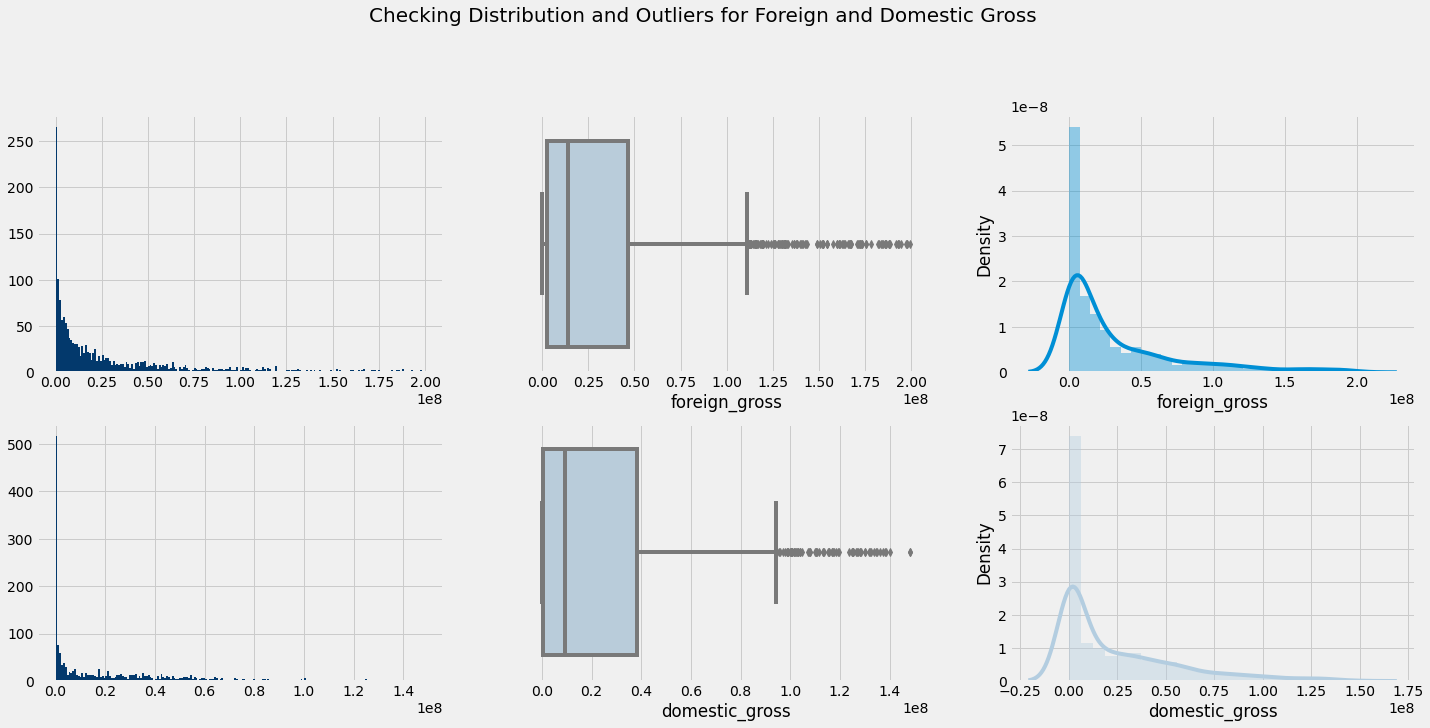

In [51]:
# initialize our plot space.
plt.figure(figsize=[22,15])
plt.suptitle("Checking Distribution and Outliers for Foreign and Domestic Gross", size=20)

# histogram for foreign gross
plt.subplot(3,3,1)
plt.hist(df_bom['foreign_gross'], bins=200, color='#03396c')
#plt.xlim(0,1000)

# boxplot for sales
plt.subplot(3,3,2)
sns.boxplot(df_bom['foreign_gross'], color='#b3cde0')

# histogram for profit
plt.subplot(3,3,3)
sns.distplot(df_bom['foreign_gross'])
#plt.hist(df_dist['profit'], bins=200, color='#03396c')
#plt.xlim(-250,300)

plt.subplot(3,3,4)
plt.hist(df_bom['domestic_gross'], bins=200, color='#03396c')

plt.subplot(3,3,5)
sns.boxplot(df_bom['domestic_gross'], color='#b3cde0')

plt.subplot(3,3,6)
sns.distplot(df_bom['domestic_gross'], color='#b3cde0')


plt.show()

In [52]:
#Remove outliers further
#Set foreign to 50000000 & dmoestic 40000000
df_bom = df_bom[(df_bom['foreign_gross'] <= 50000000) & (df_bom['domestic_gross'] <= 40000000)]

In [53]:
df_bom.shape

(1177, 5)

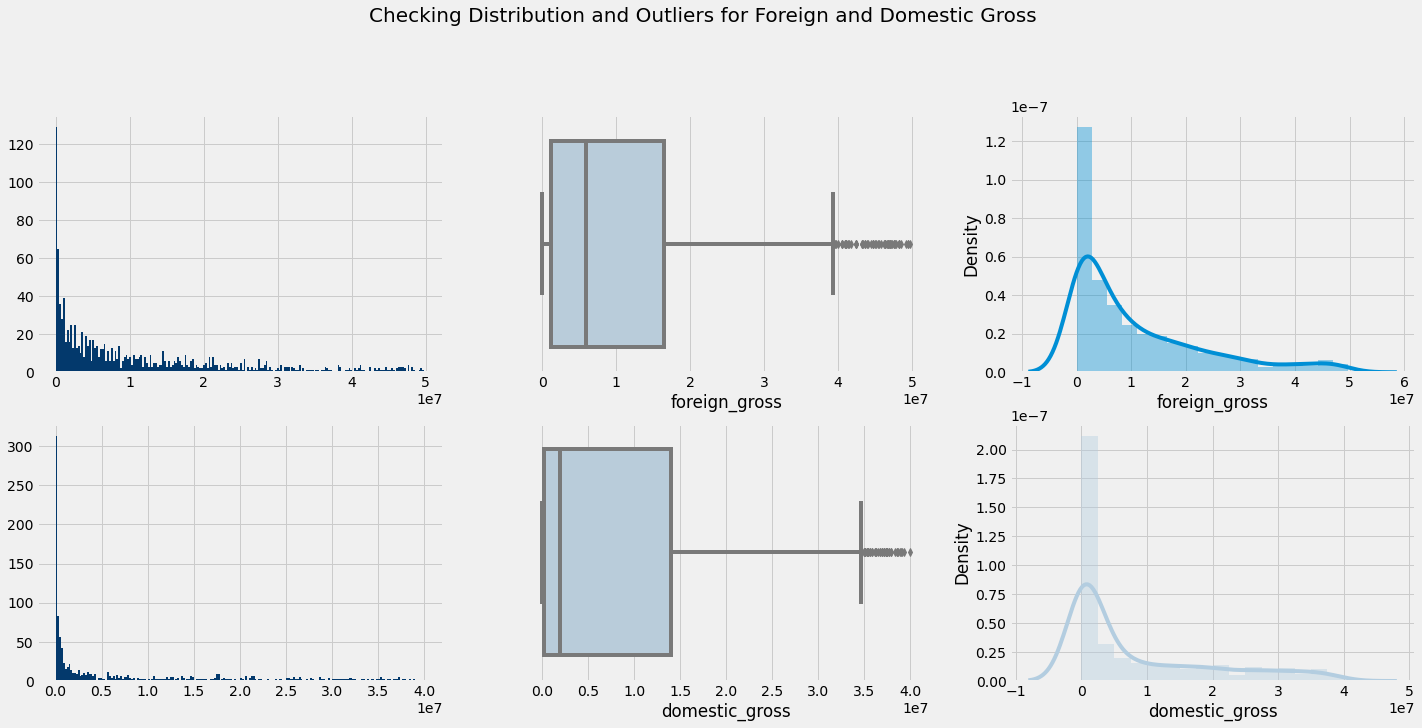

In [54]:
# initialize our plot space.
plt.figure(figsize=[22,15])
plt.suptitle("Checking Distribution and Outliers for Foreign and Domestic Gross", size=20)

# histogram for foreign gross
plt.subplot(3,3,1)
plt.hist(df_bom['foreign_gross'], bins=200, color='#03396c')
#plt.xlim(0,1000)

# boxplot for sales
plt.subplot(3,3,2)
sns.boxplot(df_bom['foreign_gross'], color='#b3cde0')

# histogram for profit
plt.subplot(3,3,3)
sns.distplot(df_bom['foreign_gross'])
#plt.hist(df_dist['profit'], bins=200, color='#03396c')
#plt.xlim(-250,300)

plt.subplot(3,3,4)
plt.hist(df_bom['domestic_gross'], bins=200, color='#03396c')

plt.subplot(3,3,5)
sns.boxplot(df_bom['domestic_gross'], color='#b3cde0')

plt.subplot(3,3,6)
sns.distplot(df_bom['domestic_gross'], color='#b3cde0')


plt.show()

In [55]:
df_bom.describe()

,domestic_gross,foreign_gross,year
count,1.177000e+03,1.177000e+03,1177.000000
mean,8.209050e+06,1.073325e+07,2013.182668
std,1.109157e+07,1.216069e+07,2.587208
min,4.000000e+02,6.000000e+02,2010.000000
25%,1.740000e+05,1.200000e+06,2011.000000
50%,2.000000e+06,6.000000e+06,2013.000000
75%,1.400000e+07,1.650000e+07,2015.000000
max,4.000000e+07,4.980000e+07,2018.000000


In [56]:
#Check the studios as categorical options [done]
# df_bom.studio.value_counts()
#Plot bar chart of the gross and domestic gross
# Use groupby to sum total gross by studio and year
# limiting groupby aggregate [done]
# slanting chart labels [done]
# clean date [NA]
# Find corolation between domestic and foreign gross [done]

In [57]:
df_bom.year.value_counts()

2010    217
2011    199
2012    148
2014    136
2013    108
2015     98
2016     93
2017     89
2018     89
Name: year, dtype: int64

Plotting Domestic and Foreign Earnings

In [58]:
#Group by year and studio
#df_bar = (df_bom.groupby(["studio","year"])["domestic_gross"].sum()).nlargest(10)
##df_bar

In [59]:
# Plotting #Group by year and studio
# df_bar.plot(kind='bar', figsize=[12,6], color = ['#009688', '#35a79c', '#54b2a9', '#65c3ba', '#83d0c9'], title="test")
# plt.ylabel("Family Member")

In [60]:
df_studio__domestic_gross = (df_bom.groupby("studio")["domestic_gross"].sum()).nlargest(10)
df_studio__domestic_gross 

studio
LGF      800345400.0
WB       779000000.0
Uni.     771838000.0
Focus    530100000.0
Fox      524200000.0
Par.     494912700.0
ORF      479899999.0
Rela.    443039000.0
BV       418580699.0
FoxS     401900000.0
Name: domestic_gross, dtype: float64

Text(0, 0.5, 'Domestic Gross Earning in Hundred million USD')

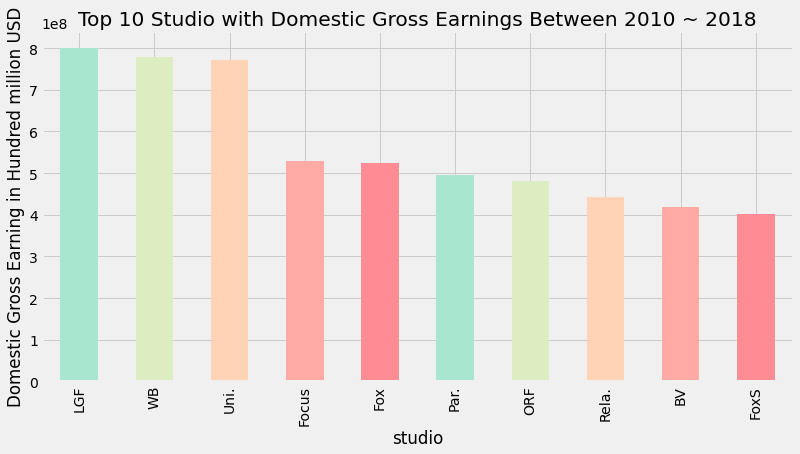

In [61]:
#plt.bar(x="studio", height='domestic_gross', color = ['#011f4b','#03396c','#005b96','#6497b1'], data=df_studio__domestic_gross)
df_studio__domestic_gross.plot(kind='bar', figsize=[12,6], color = ['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94'], title="Top 10 Studio with Domestic Gross Earnings Between 2010 ~ 2018")
plt.ylabel("Domestic Gross Earning in Hundred million USD")

In [62]:
df_studio__foreign_gross = (df_bom.groupby("studio")["foreign_gross"].sum()).nlargest(10)
df_studio__foreign_gross 

studio
LGF      762372300.0
SPC      741805999.0
Wein.    708085999.0
Uni.     690645999.0
Fox      568177599.0
Focus    548068999.0
WB       546402999.0
FoxS     426987700.0
IFC      398729599.0
FIP      376100000.0
Name: foreign_gross, dtype: float64

Text(0, 0.5, 'Foreign Gross Earning in Hundred million USD')

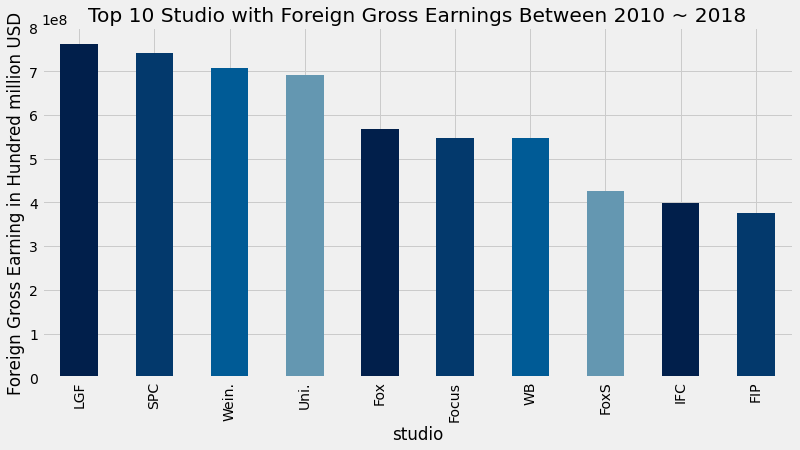

In [63]:
df_studio__foreign_gross.plot(kind='bar', figsize=[12,6], color = ['#011f4b','#03396c','#005b96','#6497b1'], title="Top 10 Studio with Foreign Gross Earnings Between 2010 ~ 2018")
plt.ylabel("Foreign Gross Earning in Hundred million USD")

Finding Correlation between domist and foreign gross

In [64]:
df_bom[['domestic_gross', 'foreign_gross']].corr()

,domestic_gross,foreign_gross
domestic_gross,1.000000,0.428594
foreign_gross,0.428594,1.000000


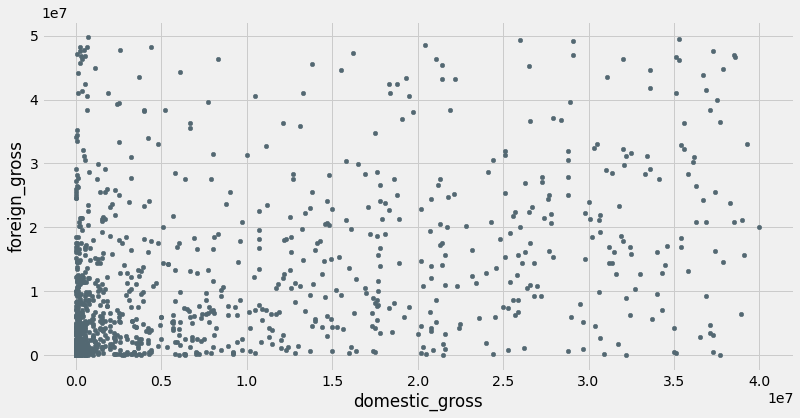

In [65]:
df_bom.plot.scatter('domestic_gross','foreign_gross', figsize=[12,6], color='#536872')

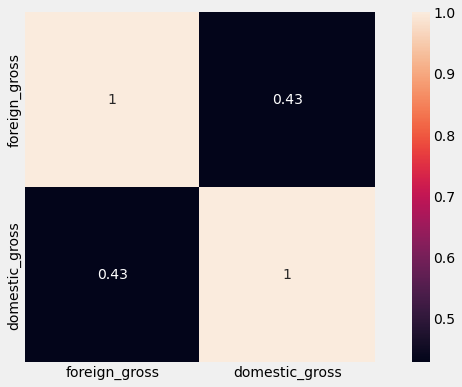

In [66]:
f, ax = plt.subplots(figsize = (12,6))
sns.heatmap(df_bom[['foreign_gross','domestic_gross']].corr(), square=True, annot=True)

#Proposal One End!

---



### RT Movie Info Dataset

In [208]:
rt_movie_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zippedData/rt.movie_info.tsv.gz", delimiter="\t")
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


This does not include all of the CSVs! Make sure you open and explore some of the other ones.

In [68]:
rt_movie_info.shape

(1560, 12)

In [69]:
rt_movie_info.id.nunique()

1560

In [70]:
rt_movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

### RT Review Dataset

In [71]:
rt_reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zippedData/rt.reviews.tsv.gz", delimiter="\t", encoding= 'unicode_escape')
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [72]:
rt_reviews.shape

(54432, 8)

In [73]:
rt_reviews.id.nunique()

1135

In [74]:
rt_reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

### TMDB Movie Info Dataset

In [75]:
tmdb_movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zippedData/tmdb.movies.csv.gz")
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [76]:
tmdb_movies.shape

(26517, 10)

In [77]:
tmdb_movies.id.nunique()

25497

In [78]:
tmdb_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [79]:
movie_budget = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zippedData/tn.movie_budgets.csv.gz")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [80]:
movie_budget.shape

(5782, 6)

In [81]:
movie_budget.id.nunique()

100

#Proposal Two Starts Here

---



SQL Data

The below line should only need to be run once. It unzips the SQL data, since SQLite doesn't work with zipped data.

In [82]:
#! unzip -n zippedData/im.db.zip

Then here is some starter code that reads one of the data tables from the database:

In [83]:
import sqlite3

In [84]:
conn = sqlite3.connect("/content/drive/MyDrive/Colab Notebooks/zippedData/im.db")

In [85]:
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [86]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [87]:
movie_basics.shape

(146144, 6)

In [88]:
movie_basics.movie_id.nunique()

146144

In [89]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [90]:
movie_ratings.shape

(73856, 3)

In [91]:
movie_ratings.movie_id.nunique()

73856

In [92]:
movie_ratings.loc[movie_ratings.movie_id == 'tt10384606', :].head()

,movie_id,averagerating,numvotes
1,tt10384606,8.9,559


In [93]:
directors = pd.read_sql("SELECT * FROM directors;", conn)
directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [94]:
directors.shape

(291174, 2)

In [95]:
directors.movie_id.nunique()

140417

In [96]:
directors.loc[directors.movie_id == 'tt0285252', :].head()

,movie_id,person_id
0,tt0285252,nm0899854


In [97]:
person = pd.read_sql("SELECT * FROM persons;", conn)
person.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [98]:
person.shape

(606648, 5)

In [99]:
person.isna().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

Merge Operations

In [100]:
# Merge movie_ratings with directors
director_movie_ratings = pd.merge(movie_ratings, directors)
director_movie_ratings .columns

Index(['movie_id', 'averagerating', 'numvotes', 'person_id'], dtype='object')

In [101]:
director_movie_ratings .head()

,movie_id,averagerating,numvotes,person_id
0,tt10356526,8.3,31,nm8353804
1,tt10356526,8.3,31,nm8353804
2,tt10384606,8.9,559,nm9932562
3,tt10384606,8.9,559,nm9250842
4,tt1042974,6.4,20,nm1915232


In [102]:
director_movie_ratings .shape

(181389, 4)

In [103]:
persons = pd.read_sql("SELECT * FROM persons;", conn)
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [104]:
# Merge director_movie_ratings with person
director_person_movie_ratings = pd.merge(director_movie_ratings , persons)
director_person_movie_ratings.columns

Index(['movie_id', 'averagerating', 'numvotes', 'person_id', 'primary_name',
       'birth_year', 'death_year', 'primary_profession'],
      dtype='object')

In [105]:
director_person_movie_ratings.head()

,movie_id,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
1,tt10356526,8.3,31,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
3,tt10322936,8.5,44,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt10384606,8.9,559,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"


In [106]:
director_person_movie_ratings.shape

(181387, 8)

In [107]:
#Merge director_person_movie_ratings with movie_basics 
movie_basic_director_ratings = pd.merge(movie_basics, director_person_movie_ratings)
movie_basic_director_ratings.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'person_id',
       'primary_name', 'birth_year', 'death_year', 'primary_profession'],
      dtype='object')

In [108]:
movie_basic_director_ratings.shape

(181387, 13)

In [209]:
movie_basic_director_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,NaN,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,NaN,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,NaN,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,NaN,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,NaN,"director,writer,actor"


In [127]:
movie_basic_director_ratings.isna().sum()

movie_id                   0
primary_title              0
original_title             0
start_year                 0
runtime_minutes        17803
genres                  1340
averagerating              0
numvotes                   0
person_id                  0
primary_name               0
birth_year            126582
death_year            180045
primary_profession       125
dtype: int64

In [138]:
death_year_na = movie_basic_director_ratings.death_year == "NaN"
death_year_na.head()

0    True
1    True
2    True
3    True
4    True
Name: death_year, dtype: bool

In [140]:
df_final_movie_basic_director_ratings = movie_basic_director_ratings[death_year_na]
df_final_movie_basic_director_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,NaN,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,NaN,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,NaN,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,NaN,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,NaN,"director,writer,actor"


In [141]:
df_final_movie_basic_director_ratings.death_year.value_counts()

NaN    181387
Name: death_year, dtype: int64

In [142]:
df_final_movie_basic_director_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes,birth_year
count,181387.000000,163584.000000,181387.000000,1.813870e+05,54805.000000
mean,2014.309802,97.789484,6.217683,4.955524e+03,1969.097856
std,2.536111,194.434689,1.388026,3.760931e+04,12.499740
min,2010.000000,3.000000,1.000000,5.000000e+00,1870.000000
25%,2012.000000,84.000000,5.400000,1.900000e+01,1962.000000
50%,2014.000000,94.000000,6.300000,6.600000e+01,1971.000000
75%,2016.000000,107.000000,7.200000,3.110000e+02,1978.000000
max,2019.000000,51420.000000,10.000000,1.841066e+06,2004.000000


Analysis

In [143]:
# select needed columns
df_director_ratings = df_final_movie_basic_director_ratings[['primary_name','numvotes','averagerating','start_year']]
df_director_ratings.head()

,primary_name,numvotes,averagerating,start_year
0,Harnam Singh Rawail,77,7.0,2013
1,Harnam Singh Rawail,77,7.0,2013
2,Harnam Singh Rawail,77,7.0,2013
3,Harnam Singh Rawail,77,7.0,2013
4,Mani Kaul,43,7.2,2019


###Data Cleaning and Pre-processing
*  get shape
*  describe
*  get skewness
*   get info
*   find and treat missing values
*  plot
*   find and treat invalid chracaters
*   Get categorical breakdown







In [ ]:
df_director_ratings.shape

In [145]:
df_director_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181387 entries, 0 to 181386
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   primary_name   181387 non-null  object 
 1   numvotes       181387 non-null  int64  
 2   averagerating  181387 non-null  float64
 3   start_year     181387 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.9+ MB


In [146]:
df_director_ratings.isna().sum()

primary_name     0
numvotes         0
averagerating    0
start_year       0
dtype: int64

In [147]:
df_director_ratings.primary_name.value_counts()

Tony Newton             217
Jason Impey             180
Shane Ryan              177
Ruben Rodriguez         150
Martin Sonntag          135
                       ... 
Rajesh Fernandes          1
Maximilian Erlenwein      1
Hakan Aksu                1
Fred Burns                1
Joost van der Wiel        1
Name: primary_name, Length: 56742, dtype: int64

Text(0, 0.5, 'Frequency')

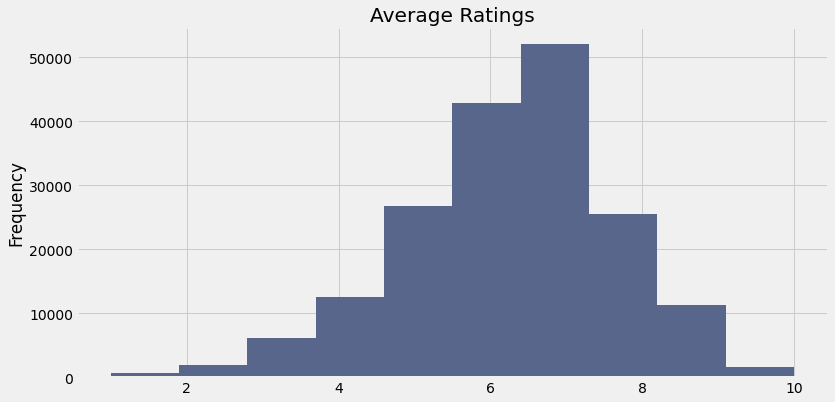

In [148]:
#plt.figure(figsize=[15,8])
#plt.hist(df_director_ratings['averagerating'], bins=200, color='#03396c')
#plt.show()
df_director_ratings['averagerating'].plot(kind='hist', figsize=[12,6], color = ['#58668b'], title="Average Ratings")
plt.ylabel("Frequency")

In [149]:
df_director_ratings['numvotes'].max()

1841066

In [150]:
df_director_ratings['numvotes'].min()

5

In [151]:
df_director_ratings.describe()

,numvotes,averagerating,start_year
count,1.813870e+05,181387.000000,181387.000000
mean,4.955524e+03,6.217683,2014.309802
std,3.760931e+04,1.388026,2.536111
min,5.000000e+00,1.000000,2010.000000
25%,1.900000e+01,5.400000,2012.000000
50%,6.600000e+01,6.300000,2014.000000
75%,3.110000e+02,7.200000,2016.000000
max,1.841066e+06,10.000000,2019.000000


Text(0, 0.5, 'Frequency')

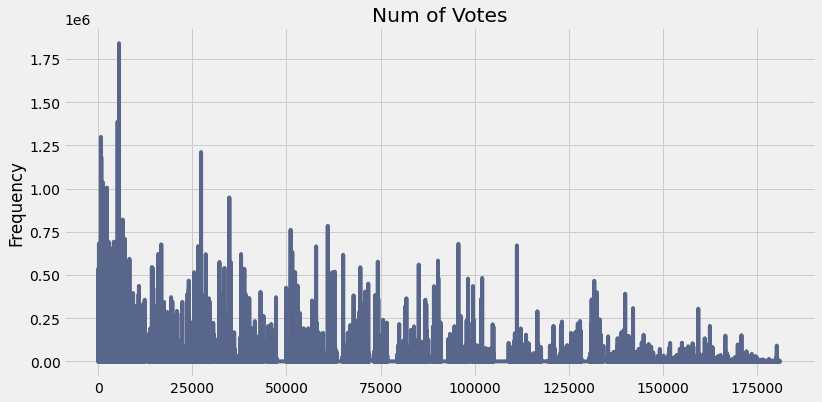

In [178]:
df_director_ratings['numvotes'].sort_index().plot(kind='line', figsize=[12,6], color = ['#58668b'], title="Num of Votes")
plt.ylabel("Frequency")

In [153]:
# get top ten average ratings by primary_name
df_dir_avg_ratings = (df_director_ratings.groupby("primary_name")["averagerating"].mean()).nlargest(10)
df_dir_avg_ratings

primary_name
Chad Carpenter            10.0
Emre Oran                 10.0
Ivana Diniz               10.0
Lindsay Thompson          10.0
Loreto Di Cesare          10.0
Masahiro Hayakawa         10.0
Michiel Brongers          10.0
Stephen Peek              10.0
Tristan David Luciotti    10.0
Amoghavarsha               9.9
Name: averagerating, dtype: float64

Text(0, 0.5, 'Average Ratings')

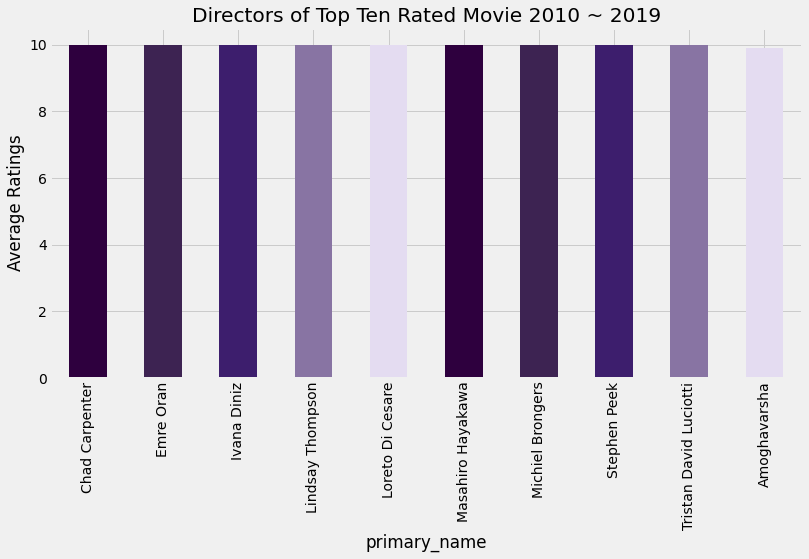

In [161]:
df_dir_avg_ratings.plot(kind='bar', figsize=[12,6], color = ['#2e003e', '#3d2352', '#3d1e6d',  '#8874a3', '#e4dcf1'], title="Directors of Top Ten Rated Movie 2010 ~ 2019")
plt.ylabel("Average Ratings")

In [179]:
# get top ten number of votes by primary_name
df_dir_vote_num = (df_director_ratings.groupby("primary_name")["numvotes"].sum()).nlargest(10)
df_dir_vote_num

primary_name
James Gunn            18640459
Joe Russo             18421688
Anthony Russo         18421593
Zack Snyder           10576977
Christopher Nolan     10457390
Matthew Vaughn         9962120
Peter Jackson          8634677
Christopher Miller     6565719
Phil Lord              6565719
Kenneth Branagh        6454844
Name: numvotes, dtype: int64

Text(0, 0.5, 'Average Ratings')

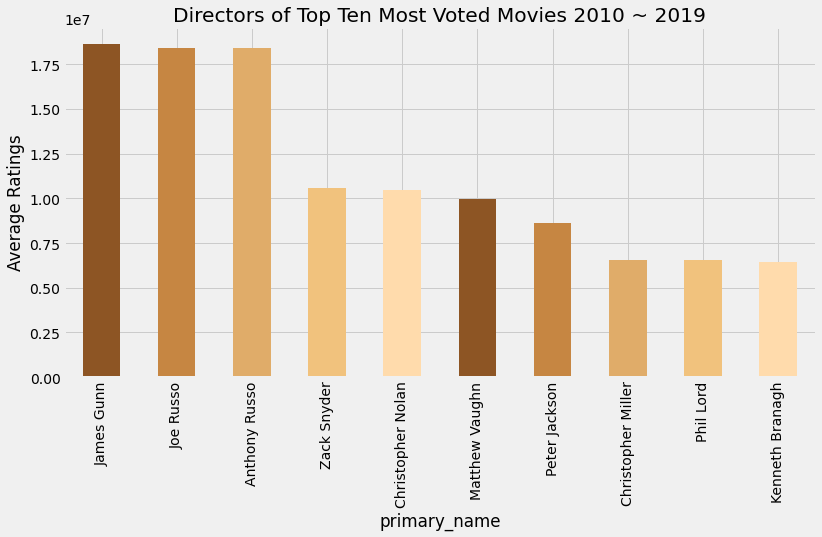

In [160]:
df_dir_vote_num.plot(kind='bar', figsize=[12,6], color = ['#8d5524', '#c68642', '#e0ac69',  '#f1c27d', '#ffdbac'], title="Directors of Top Ten Most Voted Movies 2010 ~ 2019")
plt.ylabel("Total Votes in Tens of Millions")

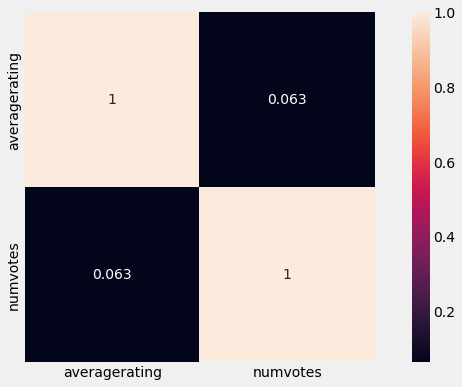

In [162]:
#find correlation between ratings and numbe of votes
f, ax = plt.subplots(figsize = (12,6))
sns.heatmap(df_director_ratings[['averagerating','numvotes']].corr(), square=True, annot=True)

#Proposal Two Ends!

---



## Your Data Analysis Here


movie_ratings, directors, person

At the end, it is always a best practice to close the connection to the database.

In [ ]:
#conn.close()